# Predictive Modelling

Author: Frauke Albrecht

<div>
<img src="1080px-Hematopoiesis_simple.svg.png" width="600"/>
</div>

Image: "By A. Rad and M. Häggström. CC-BY-SA 3.0 license." - Image:Hematopoiesis (human) diagram.png by A. Rad, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=7351905

Our given datasets contains four different types of white blood cells. Types of leukocytes can be classified in standard ways. Two pairs of broadest categories classify them either by structure (granulocytes or agranulocytes) or by cell lineage (myeloid cells or lymphoid cells). Myeloid cells (neutrophils, monocytes, eosinophils and basophils) are distinguished from lymphoid cells (lymphocytes) by hematopoietic lineage (cellular differentiation lineage).[6] Lymphocytes can be further classified as T cells, B cells, and natural killer cells.In the previous notebook we made a classififaction between Granulocytes and Agranulocytes, with Granolucytes being Eosinophils and Neutrophils and Agranulocytes Monocytes and Lymphocytes. In this notebook we will consider the second classification and divide between Lymphocytes and the rest. 

In this notebook we divide our dataset in two classes: lymphocytes and the rest and make a binary classification. **In this notebook we consider the binary classification problem lymphocytes vs all the other classes using a PCA to reduce the dimension and then applying several Machine Learning algorithms.**  The notebook is very similar to the previous one, except that the two considered classes are not balanced and we will apply sampling to achieve a balanced dataset.

Source: https://en.wikipedia.org/wiki/White_blood_cell

## Setup

In [1]:
from glob import iglob
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import precision_recall_curve, confusion_matrix, accuracy_score, classification_report, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# path to save preprocessed train images (as dataframe)
path_train_csv = "dataset2-master/dataset2-master/images/TRAIN/"

# pathes to augmented test images for each class, where the background color has been changed
path_test_augm_c = ["dataset2-master/dataset2-master/images/TEST/EOSINOPHIL_c/"
                   , "dataset2-master/dataset2-master/images/TEST/LYMPHOCYTE_c/"
                   , "dataset2-master/dataset2-master/images/TEST/MONOCYTE_c/"
                   , "dataset2-master/dataset2-master/images/TEST/NEUTROPHIL_c/"]

#path_train_lables = 
# path to save preprocessed test images (as dataframe)
path_test_csv = "dataset2-master/dataset2-master/images/TEST/Test_csv/"

## Read the Data

In [3]:
# read the data (class1)
cells1 = pd.read_csv(path_train_csv + 'train_class1_E_c.csv')
#class1 = pd.read_csv(path_train_csv + 'train_class1_E_large.csv')
print(cells1.shape)
cells1.head()

(2497, 14408)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14397,14398,14399,id,class,classE,classN,classL,classM,granulocyte
0,dataset2-master/dataset2-master/images/TRAIN/E...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.861765,0.881373,0.883333,_18_9690,1,1,0,0,0,1
1,dataset2-master/dataset2-master/images/TRAIN/E...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.741176,0.756863,0.764706,_55_7307,1,1,0,0,0,1
2,dataset2-master/dataset2-master/images/TRAIN/E...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.774510,0.728431,0.727451,_31_1626,1,1,0,0,0,1
3,dataset2-master/dataset2-master/images/TRAIN/E...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_32_1223,1,1,0,0,0,1
4,dataset2-master/dataset2-master/images/TRAIN/E...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_70_1887,1,1,0,0,0,1


In [4]:
# read the data (class2)
cells2 = pd.read_csv(path_train_csv + 'train_class2_N_c.csv')
#class2 = pd.read_csv(path_train_csv + 'train_class2_N_large.csv')
print(cells2.shape)
cells2.head()

(2499, 14408)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14397,14398,14399,id,class,classE,classN,classL,classM,granulocyte
0,dataset2-master/dataset2-master/images/TRAIN/N...,0.878431,0.864706,0.868627,0.790196,0.770588,0.776471,0.801961,0.769608,0.780392,...,0.882353,0.882353,0.882353,_142_4726,2,0,1,0,0,1
1,dataset2-master/dataset2-master/images/TRAIN/N...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.881373,0.882353,0.880392,...,0.882353,0.882353,0.882353,_129_6939,2,0,1,0,0,1
2,dataset2-master/dataset2-master/images/TRAIN/N...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_34_7704,2,0,1,0,0,1
3,dataset2-master/dataset2-master/images/TRAIN/N...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_155_8195,2,0,1,0,0,1
4,dataset2-master/dataset2-master/images/TRAIN/N...,0.747059,0.615686,0.635294,0.733333,0.625490,0.707843,0.785294,0.724510,0.802941,...,0.882353,0.882353,0.882353,_45_3300,2,0,1,0,0,1


In [5]:
# read the data (class3)
cells3 = pd.read_csv(path_train_csv + 'train_class3_L_c.csv')
#class3 = pd.read_csv(path_train_csv + 'train_class3_L_large.csv')
print(cells3.shape)
cells3.head()

(2483, 14408)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14397,14398,14399,id,class,classE,classN,classL,classM,granulocyte
0,dataset2-master/dataset2-master/images/TRAIN/L...,0.703922,0.617647,0.594118,0.711765,0.535294,0.535294,0.698039,0.535294,0.521569,...,0.773529,0.697059,0.682353,_6_1405,3,0,0,1,0,0
1,dataset2-master/dataset2-master/images/TRAIN/L...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_13_4518,3,0,0,1,0,0
2,dataset2-master/dataset2-master/images/TRAIN/L...,0.772549,0.622549,0.623529,0.754902,0.602941,0.615686,0.767647,0.616667,0.615686,...,0.882353,0.882353,0.882353,_19_3956,3,0,0,1,0,0
3,dataset2-master/dataset2-master/images/TRAIN/L...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_12_5987,3,0,0,1,0,0
4,dataset2-master/dataset2-master/images/TRAIN/L...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.872549,0.882353,0.878431,_20_4702,3,0,0,1,0,0


In [6]:
# read the data (class4)
cells4 = pd.read_csv(path_train_csv + 'train_class4_M_c.csv')
#class4 = pd.read_csv(path_train_csv + 'train_class4_M_large.csv')
print(cells4.shape)
cells4.head()

(2478, 14408)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14397,14398,14399,id,class,classE,classN,classL,classM,granulocyte
0,dataset2-master/dataset2-master/images/TRAIN/M...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.880392,0.881373,...,0.882353,0.882353,0.882353,_4_825,4,0,0,0,1,0
1,dataset2-master/dataset2-master/images/TRAIN/M...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.881373,0.881373,0.881373,...,0.881373,0.881373,0.881373,_3_8282,4,0,0,0,1,0
2,dataset2-master/dataset2-master/images/TRAIN/M...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_8_9083,4,0,0,0,1,0
3,dataset2-master/dataset2-master/images/TRAIN/M...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.881373,0.882353,0.880392,...,0.702941,0.638235,0.637255,_9_5268,4,0,0,0,1,0
4,dataset2-master/dataset2-master/images/TRAIN/M...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_13_9280,4,0,0,0,1,0


In [7]:
# save all in 1 dataframe and delete the others
blood = cells1.copy()
blood = blood.append(cells2)
del cells1
blood = blood.append(cells3)
del cells2
blood = blood.append(cells4)
del cells3
del cells4
blood.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14397,14398,14399,id,class,classE,classN,classL,classM,granulocyte
0,dataset2-master/dataset2-master/images/TRAIN/E...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.861765,0.881373,0.883333,_18_9690,1,1,0,0,0,1
1,dataset2-master/dataset2-master/images/TRAIN/E...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.741176,0.756863,0.764706,_55_7307,1,1,0,0,0,1
2,dataset2-master/dataset2-master/images/TRAIN/E...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.774510,0.728431,0.727451,_31_1626,1,1,0,0,0,1
3,dataset2-master/dataset2-master/images/TRAIN/E...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_32_1223,1,1,0,0,0,1
4,dataset2-master/dataset2-master/images/TRAIN/E...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_70_1887,1,1,0,0,0,1


Lymphocytes: [0 1]


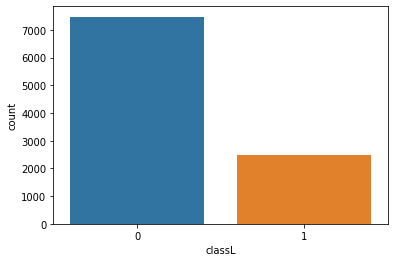

In [8]:
# the data is unbalanced
print("Lymphocytes: " + str(blood["classL"].unique()))
sns.countplot(x = blood["classL"]);

## Sampling

Since the class Lymphocytes is underrepresented in the dataset we will under-sample the other class, so that we get a balanced dataset.

Random under-sampling:
1    2483
0    2483
Name: classL, dtype: int64


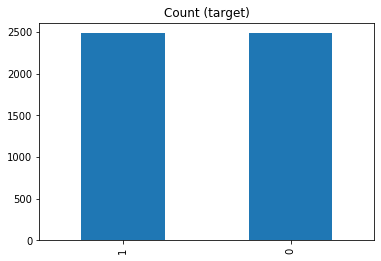

In [9]:
# under sampling

# class count
count_classL_0, count_classL_1 = blood["classL"].value_counts()

# divide by class
df_classL_0 = blood[blood['classL'] == 0]
df_classL_1 = blood[blood['classL'] == 1]

# select count_classL_1 elements from class 0, so that both classes have the same number of observations
df_classL_0_under = df_classL_0.sample(count_classL_1)
blood_under = pd.concat([df_classL_0_under, df_classL_1], axis=0)

print('Random under-sampling:')
print(blood_under.classL.value_counts())

blood_under.classL.value_counts().plot(kind='bar', title='Count (target)');

In [10]:
# from now on we work with the sampled dataset, so that the two classes are balanced
del blood

In [11]:
blood_under.shape

(4966, 14408)

In [12]:
blood_under.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14397,14398,14399,id,class,classE,classN,classL,classM,granulocyte
38,dataset2-master/dataset2-master/images/TRAIN/N...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.880392,0.882353,0.880392,...,0.719608,0.713725,0.749020,_69_6925,2,0,1,0,0,1
1947,dataset2-master/dataset2-master/images/TRAIN/E...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_55_5512,1,1,0,0,0,1
487,dataset2-master/dataset2-master/images/TRAIN/E...,0.765686,0.705882,0.745098,0.772549,0.710784,0.733333,0.741176,0.680392,0.679412,...,0.882353,0.882353,0.882353,_12_4895,1,1,0,0,0,1
486,dataset2-master/dataset2-master/images/TRAIN/N...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.729412,0.640196,0.698039,_83_7540,2,0,1,0,0,1
708,dataset2-master/dataset2-master/images/TRAIN/N...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.664706,0.544118,0.550980,_16_9303,2,0,1,0,0,1


Lymphocyte classes: [0 1]


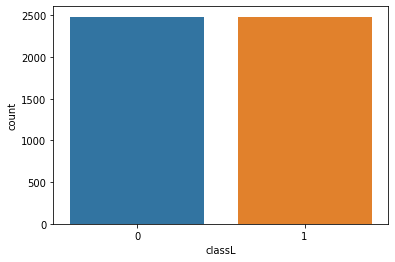

In [13]:
# now the data is balanced
print("Lymphocyte classes: " + str(blood_under["classL"].unique()))
sns.countplot(x = blood_under["classL"]);

## baseline Model

### Metrics 

In order to define a baseline model, we need to decide for a metric, which we want to maximize. As base metrics we will consider the **accuracy** and the **auc score**. The accuracy gives the percentage of correct classification. Additionally, the auc score helps to select only models that achieve false positive and true positive rates (also called recall or sensitivity) that are above random chance. This is not guaranteed for accuracy. The **recall**  gives us the number of true positive tests compared to all positives. This measure is interesting, if you are trying ti detect a desease and want to be sure to test everyone, who actaully has the desease really as positive. The **precision** gives us the rate of all true positve tests to all positive tests. A high precision means a low false positive tests, which would be the objective, if you only want to get positive tests, when the person is really positive. Since our classification is no test in the sence of positive and negative results, that is there none of the classes is more important, we will rely on the **accuray and the auc score**. To get the baseline accuracy we will use the model that always predicts the majority class. Since our distribution equally distributed by construction the **baseline accuracy is 0.5**. The **auc score** of a random choice would be **0.5**, which we will use as the base value.

## Prepare the data for modelling

Note: We don't need to safe a test set as we already have a separate dataset given for testing. 

The data is ordered, since all Lymphocytes are in the second half of the dataframe, so the first step we have to do is to shuffle the dataframe. We then define the features (the pixels) and the target (classL). The data is ordered by the classes, so the first step we have to do is to shuffle the dataframe. A PCA is then performed to reduce the dimension of the features. This is done together with a cross-validation with 5 folds. The results of the PCA are shown as before and after plots of the images as well as the explained variances of the first 20 eigenvectors.

### Shuffle the data

the data is shuffled by sampling the observations over the entire size of the dataframe.

In [14]:
# shuffle the data
blood_under = blood_under.sample(frac=1).reset_index(drop=True)
blood_under.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14397,14398,14399,id,class,classE,classN,classL,classM,granulocyte
0,dataset2-master/dataset2-master/images/TRAIN/N...,0.722549,0.605882,0.648039,0.727451,0.617647,0.662745,0.728431,0.621569,0.669608,...,0.882353,0.882353,0.882353,_69_4070,2,0,1,0,0,1
1,dataset2-master/dataset2-master/images/TRAIN/L...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_6_5400,3,0,0,1,0,0
2,dataset2-master/dataset2-master/images/TRAIN/L...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.888235,0.874510,0.880392,_9_2342,3,0,0,1,0,0
3,dataset2-master/dataset2-master/images/TRAIN/M...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.878431,0.882353,0.878431,_6_9072,4,0,0,0,1,0
4,dataset2-master/dataset2-master/images/TRAIN/E...,0.813725,0.789216,0.754902,0.808824,0.742157,0.756863,0.767647,0.674510,0.717647,...,0.874510,0.874510,0.880392,_44_4625,1,1,0,0,0,1


### Define Features and Target

The positions of the features (pixels) and the target (classL) are set.

In [15]:
# Which indices do we need for the features? (=pixels)
blood_under.iloc[:,1:14401].head()

,0,1,2,3,4,5,6,7,8,9,...,14390,14391,14392,14393,14394,14395,14396,14397,14398,14399
0,0.722549,0.605882,0.648039,0.727451,0.617647,0.662745,0.728431,0.621569,0.669608,0.729412,...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353
1,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353
2,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.880392,0.878431,0.878431,0.880392,0.883333,0.875490,0.880392,0.888235,0.874510,0.880392
3,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.874510,0.878431,0.882353,0.876471,0.878431,0.882353,0.878431,0.878431,0.882353,0.878431
4,0.813725,0.789216,0.754902,0.808824,0.742157,0.756863,0.767647,0.674510,0.717647,0.757843,...,0.798039,0.830392,0.834314,0.806863,0.867647,0.868627,0.859804,0.874510,0.874510,0.880392


In [16]:
# Which index do we need for the target? (=classL)
blood_under.iloc[:,14405].head()

0    0
1    1
2    1
3    0
4    0
Name: classL, dtype: int64

In [17]:
start_f = 1
end_f = 14401
idx_t = 14405

### Principal Component Analysis

The principal component analysis (PCA) is depending on the underlying dataset, that is performing the PCA to different parts of the data might lead to different results. To test the robustness of the PCA we use 5 subsets of it and perform it on each one with 90% of the explained variance. The results show that for all folds the feature importance resulting from the PCA is very similar (only marginal differences). The eigenvectors also look very similar (except sign differences). This leads to the conclusion that this is a robust operation and confirms the assumption that we can apply this transformation also to the test data. 

In [18]:
# kfold cross validation with 5 folds
# save pca components in dictionary pca_components = {'train/test_kfold': {train/test data}} 
# save y_train in dictionary y_cv = {'train/test_kfold': {train/test data}} 
kfold=5
X_cf = {}
pca_transformed = {}
pca_components = {}
pca_explained_variance = {}
pca_singular_values = {}
pca_projected = {}
y_cv = {}
i=0
kf = KFold(n_splits=kfold, shuffle=True, random_state=42)
for train_index, test_index in kf.split(blood_under):
    i+=1
    print("-"*20 + str(i) + ". fold validation" + "-"*20)
    #print("TRAIN:", train_index, "TEST:", test_index)
    train = blood_under.iloc[train_index]
    test =  blood_under.iloc[test_index]
    X_train = train.iloc[:,start_f:end_f]
    X_test = test.iloc[:,start_f:end_f]
    y_train = train.iloc[:,idx_t]
    y_test = test.iloc[:,idx_t]
    X_cf["train_"+str(i)] = X_train
    X_cf["test_"+str(i)] = X_test
    # PCA
    print("start PCA")
    #n_components=0.90 means it will return the Eigenvectors that have the 90% of the variation in the dataset
    blood_pca = PCA(n_components=0.9,svd_solver = 'full')
    blood_pca.fit(X_train)
    transformed_train = blood_pca.transform(X_train)
    transformed_test = blood_pca.transform(X_test)
    #save pcs in dictionary
    pca_transformed["train_"+str(i)] = transformed_train
    pca_transformed["test_"+str(i)] = transformed_test
    #save train sets in dictionary
    y_cv["train_"+str(i)] = y_train
    y_cv["test_"+str(i)] = y_test
    print("Shape of X_train before PCA: " + str(X_train.shape))
    print("Shape of X_test before PCA: " + str(X_test.shape))
    print("Shape of X_train after PCA: " + str(transformed_train.shape))
    print("Shape of X_test after PCA: " + str(transformed_test.shape))
    pca_explained_variance[str(i)] = blood_pca.explained_variance_ratio_
    #components
    pca_components[str(i)] = blood_pca.components_
    #singular values
    pca_singular_values[str(i)] = blood_pca.singular_values_
    #reconstruct images from PCs
    projected = blood_pca.inverse_transform(transformed_train)
    pca_projected[str(i)] = projected
    print("end PCA")
    


--------------------1. fold validation--------------------
start PCA
Shape of X_train before PCA: (3972, 14400)
Shape of X_test before PCA: (994, 14400)
Shape of X_train after PCA: (3972, 348)
Shape of X_test after PCA: (994, 348)
end PCA
--------------------2. fold validation--------------------
start PCA
Shape of X_train before PCA: (3973, 14400)
Shape of X_test before PCA: (993, 14400)
Shape of X_train after PCA: (3973, 349)
Shape of X_test after PCA: (993, 349)
end PCA
--------------------3. fold validation--------------------
start PCA
Shape of X_train before PCA: (3973, 14400)
Shape of X_test before PCA: (993, 14400)
Shape of X_train after PCA: (3973, 349)
Shape of X_test after PCA: (993, 349)
end PCA
--------------------4. fold validation--------------------
start PCA
Shape of X_train before PCA: (3973, 14400)
Shape of X_test before PCA: (993, 14400)
Shape of X_train after PCA: (3973, 349)
Shape of X_test after PCA: (993, 349)
end PCA
--------------------5. fold validation------

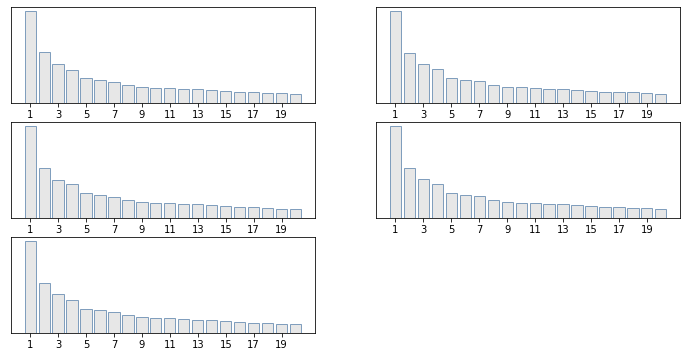

In [19]:
#importance of components
#plot explained variances of first 20 components
fig, axes = plt.subplots(3,2,figsize=(12,6))
plt.setp(axes, xticks=[1,3,5,7,9,11,13,15,17,19], xticklabels=['1', '3', '5','7','9','11','13','15','17','19'],
        yticks=[1, 2, 3])
x = np.arange(1,21,1)
color = (0.1, 0.1, 0.1, 0.1)
edgecolor = (0.2, 0.4, 0.6, 0.6)

axes[0,0].bar(x, height=pca_explained_variance[str(1)][:20], color=color,  edgecolor=edgecolor);
axes[0,1].bar(x, height=pca_explained_variance[str(2)][:20], color=color,  edgecolor=edgecolor);
axes[1,0].bar(x, height=pca_explained_variance[str(3)][:20], color=color,  edgecolor=edgecolor);
axes[1,1].bar(x, height=pca_explained_variance[str(4)][:20], color=color,  edgecolor=edgecolor);
axes[2,0].bar(x, height=pca_explained_variance[str(5)][:20], color=color,  edgecolor=edgecolor);
fig.delaxes(axes[2,1])

In [20]:
# eigenvectors for all five folds
def plot_eigenv(comp):
    fig, axes = plt.subplots(2,10,figsize=(12,3),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.01, wspace=0.01))
    for i, ax in enumerate(axes.flat):
        img = comp[i].reshape(60,80,3)
        ax.imshow((img * 255).astype(np.uint8),cmap='gray')

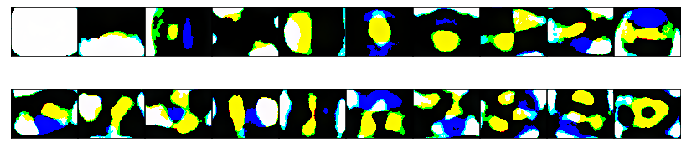

In [21]:
plot_eigenv(pca_components[str(1)])

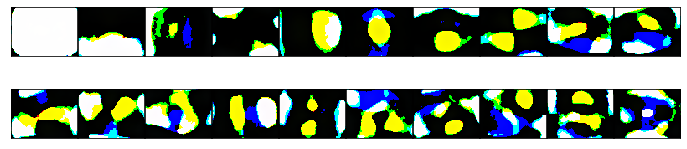

In [22]:
plot_eigenv(pca_components[str(2)])

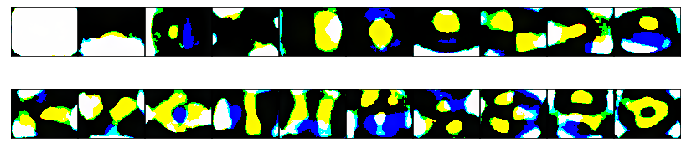

In [23]:
plot_eigenv(pca_components[str(3)])

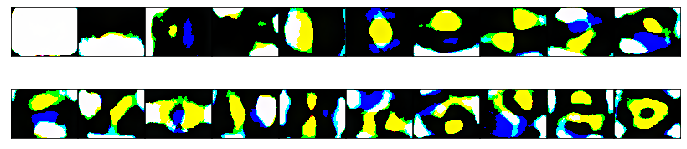

In [24]:
plot_eigenv(pca_components[str(4)])

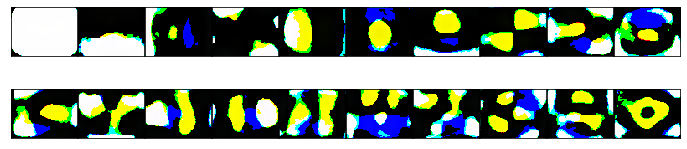

In [25]:
plot_eigenv(pca_components[str(5)])

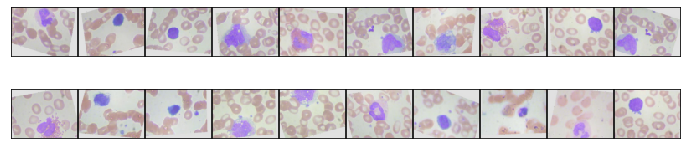

In [26]:
# images before pca
fig, axes = plt.subplots(2,10,figsize=(12,3), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    #img = np.asarray(blood.iloc[i,1:14401]).reshape(60,80,3)
    img = np.asarray(X_cf["train_"+str(1)])[i].reshape(60,80,3)
    ax.imshow((img * 255).astype(np.uint8))

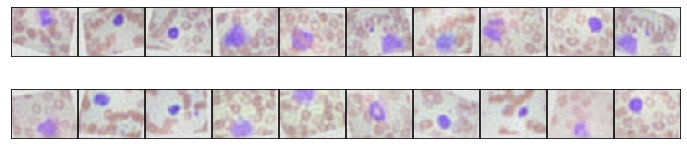

In [27]:
# reconstructed images from pca
fig, axes = plt.subplots(2, 10,figsize=(12,3), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    img = pca_projected[str(1)][i].reshape(60,80,3)
    ax.imshow((img * 255).astype(np.uint8))

## Model Setup

Set up a set of considered models, which are evaluated by a set of metrics. The most important metrics for our case are the **accuracy and the roc auc score**. The resulting scores for the metrics are plotted for all considered models. Over all metrics the best performing models are the **SVC** and the **KNeighborClassifier**. The scores of all models are stored in a dataframe.

### Train-Test-Split

Although in the Kaggle dataset, there is a separate folder for test data, we only use the train data, because there seem to be some issues with the test data considering wrong labeling. We will split a test set from our dataset and use it for testing later.

In [28]:
X = blood_under.iloc[:,1:14401]
y = blood_under.iloc[:,14405]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

### Principal Component Analyis

We saw that the results of the PCAs on the 5-folds all were very close to each other. We will now perform a PCA on the entire training set to reduce the dimension and then apply the models to this reduced space. We do not assume that this leads to great mistakes, as the results on the 5 subsets were so close. This procedure will make the following worksteps easier and faster to calculate on the notebook. 

In [29]:
# pca on entire trainingset
#X_train = blood_under.iloc[:,1:14401]
#X_test = blood_under.iloc[:,1:14401]
#y_train = blood_under.iloc[:,14405]
#y_test = blood_under.iloc[:,14405]
blood_pca = PCA(n_components=0.8,svd_solver = 'full')
blood_pca.fit(X_train)
transformed_train = blood_pca.transform(X_train)
transformed_test = blood_pca.transform(X_test)
print("Shape of X_train before PCA: " + str(X_train.shape))
print("Shape of X_test before PCA: " + str(X_test.shape))
print("Shape of X_train after PCA: " + str(transformed_train.shape))
print("Shape of X_test after PCA: " + str(transformed_test.shape))

Shape of X_train before PCA: (3972, 14400)
Shape of X_test before PCA: (994, 14400)
Shape of X_train after PCA: (3972, 134)
Shape of X_test after PCA: (994, 134)


In [30]:
# explained variances
blood_pca.explained_variance_ratio_[:20]

array([0.09382612, 0.0515309 , 0.03980186, 0.03355141, 0.02496249,
       0.02330862, 0.02157104, 0.01830066, 0.01629351, 0.01546772,
       0.01484737, 0.01419664, 0.01353864, 0.01314659, 0.01195824,
       0.01084653, 0.0106446 , 0.0102941 , 0.00953733, 0.00864073])

Sum of explained variance: 0.46


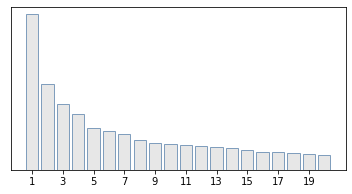

In [31]:
#importance of components
#plot explained variances of first 20 components
fig, axes = plt.subplots(1,1,figsize=(6,3))
plt.setp(axes, xticks=[1,3,5,7,9,11,13,15,17,19], xticklabels=['1', '3', '5','7','9','11','13','15','17','19'],
        yticks=[1, 2, 3])
x = np.arange(1,21,1)
color = (0.1, 0.1, 0.1, 0.1)
edgecolor = (0.2, 0.4, 0.6, 0.6)
#x = np.arange(1,4,1)
axes.bar(x, height=blood_pca.explained_variance_ratio_[0:20], color=color,  edgecolor=edgecolor);
#axes.bar(x, height=blood_pca.explained_variance_ratio_);
print("Sum of explained variance: {:.2f}".format(blood_pca.explained_variance_ratio_[0:20].sum()))

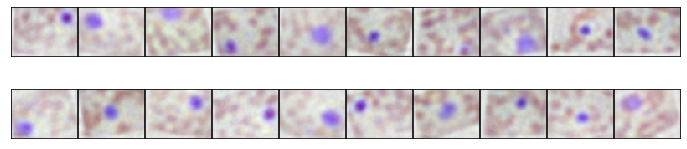

In [32]:
# reconstructed images from pca
pca_projected = blood_pca.inverse_transform(transformed_train)

fig, axes = plt.subplots(2, 10,figsize=(12,3), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    img = pca_projected[i].reshape(60,80,3)
    ax.imshow((img * 255).astype(np.uint8))

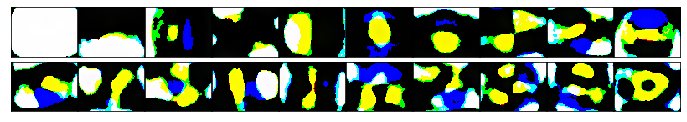

In [33]:
# eigenvectors
fig, axes = plt.subplots(2,10,figsize=(12,2),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    img = blood_pca.components_[i].reshape(60,80,3)
    ax.imshow((img * 255).astype(np.uint8),cmap='gray')

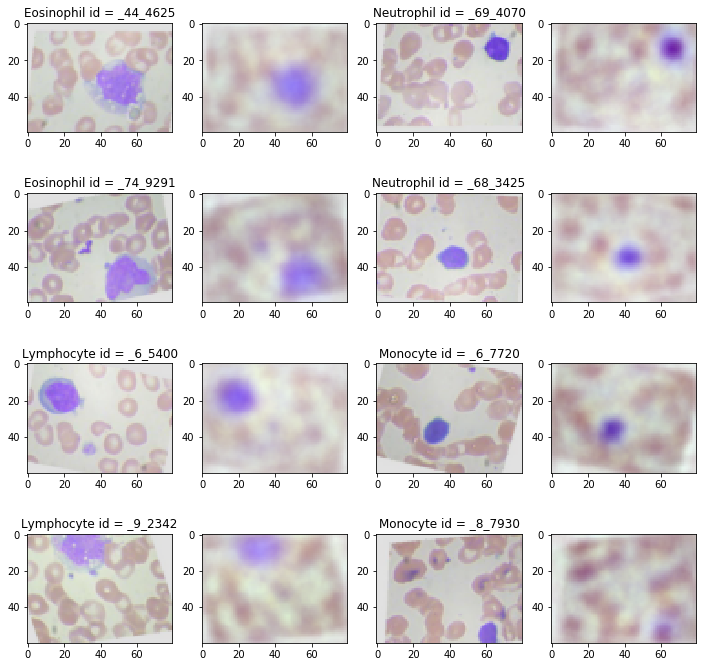

In [34]:
# plot some images before and after pca
# plot components 
# plot some of the augmented images

#train_index -> images selected for cross fold

fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(12, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
n = 16
m1 = m2 = m3 = m4 = 0

for i in range(blood_under.shape[0]):
    if (blood_under.iloc[i,14402] == 1) & (m1<2): # first category  # & (i in train_index)
        m1 += 1
        current_id = blood_under.iloc[i,14401]         
        axes[m1-1,0].set_title("Eosinophil id = " + current_id)
        img = np.asarray(X_train.iloc[i,:]).reshape(60,80,3)
        axes[m1-1,0].imshow((img * 255).astype(np.uint8))


        img = pca_projected[i].reshape(60,80,3)
        axes[m1-1,1].imshow((img * 255).astype(np.uint8))
        
    if (blood_under.iloc[i,14402] == 2) & (m2<=1): # second category
        m2 += 1
        current_id = blood_under.iloc[i,14401]         
        axes[m2-1,2].set_title("Neutrophil id = " + current_id)
        img = np.asarray(X_train.iloc[i,:]).reshape(60,80,3)
        axes[m2-1,2].imshow((img * 255).astype(np.uint8))


        img = pca_projected[i].reshape(60,80,3)
        axes[m2-1,3].imshow((img * 255).astype(np.uint8))        

    if (blood_under.iloc[i,14402] == 3) & (m3<=1): # third category
        m3 += 1
        current_id = blood_under.iloc[i,14401]         
        axes[m3+1,0].set_title("Lymphocyte id = " + current_id)
        img = np.asarray(X_train.iloc[i,:]).reshape(60,80,3)
        axes[m3+1,0].imshow((img * 255).astype(np.uint8))

        img = pca_projected[i].reshape(60,80,3)
        axes[m3+1,1].imshow((img * 255).astype(np.uint8))        

    if (blood_under.iloc[i,14402] == 4) & (m4<=2): # fourth category
        m4 += 1
        current_id = blood_under.iloc[i,14401]         
        axes[m4,2].set_title("Monocyte id = " + current_id)
        img = np.asarray(X_train.iloc[i,:]).reshape(60,80,3)
        axes[m4,2].imshow((img * 255).astype(np.uint8))

        img = pca_projected[i].reshape(60,80,3)
        axes[m4,3].imshow((img * 255).astype(np.uint8))        

    if(m1>=2 & m2>=2 & m3>2 & m4>2):
        break

### Test different Models

We set up some possible models we can use for the classification problem and evaluate their results.

In [35]:
# Define a list of possible models
clfs = [LogisticRegression(solver="lbfgs", random_state=42)
       , KNeighborsClassifier()#n_neighbors=5)
       , GaussianNB()
       , SVC(random_state=42)#C=1, kernel="rbf", gamma='scale', random_state=42)
       , LinearSVC(C=1, random_state=42)
       , RandomForestClassifier(n_estimators=500, criterion="gini", max_depth=5, random_state=42)
       , AdaBoostClassifier(random_state=42)
       , XGBClassifier(random_state=42)]

In [36]:
# Function that performs cross validation and returns the desired metric(s)
# The metrics are stored in a dictionary
def model_evaluation_cv(X_train, y_train, clf, params_model=None, 
                     params_cross={"cv":5, "scoring":['accuracy','precision','recall','roc_auc','f1']}):
    
    # cross validation
    scores = cross_validate(clf, X_train, y_train, **params_cross)
    # return the list of all dictionary keys with mean values (mean over metrics from folds) 
    scores = {key: value.mean() for (key, value) in scores.items()}

    return scores

In [37]:
# Perform the model evaluation for all models in clf and cross folds
# Save the results in a dictionary, as follows: results ={'clf': {'cross_fold': {metrics}}}
kfold=5
results = {}
for clf in clfs:
    clf_name = clf.__class__.__name__
    scores = model_evaluation_cv(X_train = transformed_train, y_train = y_train, clf = clf)
    results[clf_name] = scores        
#print(results)

/Users/frauke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/frauke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/frauke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/frauke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/frauke/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to conver

In [38]:
# Function for the plots
# "results" is the dictionary containing the scores
# Remember: results = {'clf': {'cross_fold': {metrics}}

def plot_results(scores_mean, legend_labels, title='Model Comparison'):
    width = 0.5
    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_facecolor((1.0, 250/255, 234/255))
    clfs = list(scores_mean.keys())
    x = np.arange(0, (len(clfs)+1)*(len(legend_labels)-2), len(clfs)+1)
    for clf in clfs:        
        score_list = []
        x+=1
        for score in scores_mean[clf]:
            if (score!="fit_time") and (score!="score_time"):
                #score_list contains all scores for one model
                score_list.append(scores_mean[clf][score])
        rects1 = ax.bar(x - width/2, score_list, width, label=clf, alpha=1)
        ax.set_ylabel('score')
        ax.set_title(title)
        ax.set_ylim(0.5,1)
        ax.set_xticks(x-len(clfs)/2)
        ax.set_xticklabels(score_labels[2:])
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3, fancybox=True)

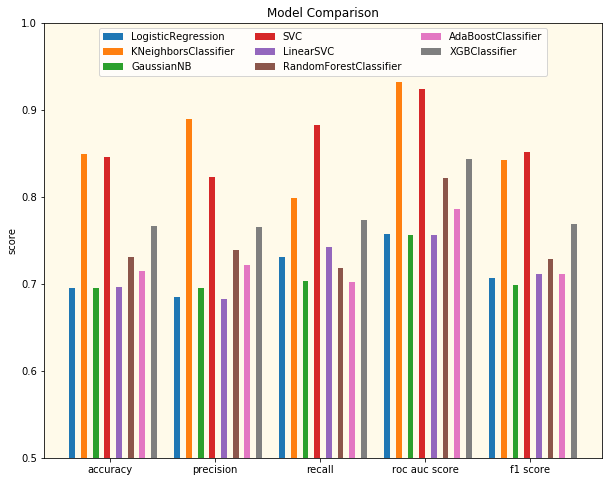

In [39]:
score_labels = ["fit time", "score time", "accuracy", "precision", "recall", "roc auc score", "f1 score"]
plot_results(results, score_labels)

In [40]:
#store scores in dataframe
def df_scores(scores_mean, legend_labels):
    
    clfs    = list(scores_mean.keys())
    metrics = legend_labels
    data = { "metric": [metrics[0], metrics[1], metrics[2], metrics[3], metrics[4], metrics[5], metrics[6]]}
    df = pd.DataFrame (data, columns = ["metric"])
    x = np.arange(0, (len(legend_labels)+2)*(len(legend_labels)+1), len(clfs)+2)
    for clf in clfs:   
        score_list = []
        x += 1
        for score in scores_mean[clf]:
            score_list.append(scores_mean[clf][score])
        df[clf] = score_list 
    return df

In [41]:
score_labels = ["fit time", "score time","accuracy", "precision", "recall", "roc auc score", "f1 score"]
scores_df = df_scores(results,score_labels).set_index("metric")
scores_df

,LogisticRegression,KNeighborsClassifier,GaussianNB,SVC,LinearSVC,RandomForestClassifier,AdaBoostClassifier,XGBClassifier
metric,,,,,,,,
fit time,0.058445,0.012638,0.006923,1.653314,1.238751,6.015257,2.113460,3.787051
score time,0.004441,1.017540,0.008075,0.699127,0.005364,0.128003,0.034742,0.013812
accuracy,0.695622,0.849197,0.695625,0.845678,0.696882,0.730617,0.714259,0.766872
precision,0.684814,0.889910,0.695104,0.822583,0.682493,0.738350,0.721557,0.765016
recall,0.730326,0.798997,0.702757,0.883208,0.741855,0.718296,0.701754,0.773434
roc auc score,0.756757,0.931542,0.755980,0.924583,0.756345,0.822197,0.785808,0.843259
f1 score,0.706814,0.841858,0.698736,0.851809,0.710913,0.728164,0.711489,0.769167


## Hyperparameter Tuning

We see that the two models **KNeighborClassifier** and **SVC** give the best results. Therefore from now on we  consider these two classifiers and tune the hyperparameters towards the **roc auc score**. However, **KNeighborClassifier** is much slower than the **SVC** ins scoring time.

In [42]:
# Decide for 2 models: SVC, KNeighborsClassifier
clfs_sel = [SVC(C=1, kernel="rbf", gamma='scale', random_state=42)
            , KNeighborsClassifier(n_neighbors=5)]

param_sets = [
              # parameters for svc
                { 'kernel': ['poly','rbf']
                , 'C': [0.1,1,10]
                , 'gamma':[1,0.1,0.001]
                , 'probability':[True]}
                #, 'n_jobs':[-1]}  
              # parameters for knn  
                ,{ 'n_neighbors': [3,5,7]
                , 'weights': ['uniform','distance']
                , 'leaf_size':[10,30,50]
                , 'p':[1,2,3]}
                #, 'n_jobs':[-1]} 
            ]

In [43]:
# Gridsearch with scoring roc_auc, returns the best estimator
def grid_search(X_train, y_train, clf, param):
    #CLF = GridSearchCV(clf, param, scoring='roc_auc', n_jobs=-1, cv=5)
    CLF = GridSearchCV(clf, param, scoring='accuracy', n_jobs=-1, cv=5)
    best_clf = CLF.fit(X_train, y_train)
    return best_clf.best_estimator_

In [44]:
def grid_search_res(X_train, y_train, clfs, param_sets):
    # perform the grid-search over all scenarios and all classifiers
    # and save the results in a dictionary: grid_search_results = {clf: {}}
    grid_search_results = {}
    for clf, param_set in zip(clfs_sel, param_sets):
        print(clf.__class__.__name__)
        print(param_set)
        grid_search_results[clf.__class__.__name__] = grid_search(X_train, y_train, clf, param_set)
    # evaluate the best classifiers and return the scores
    # safe scores in a dictionary: grid_search_scores = {clf: {scores}}
    print(grid_search_results)
    grid_search_scores = {}
    for clf in clfs:
        clf_name = clf.__class__.__name__
        scores = model_evaluation_cv(X_train, y_train, clf)
        grid_search_scores[clf_name] = scores 
    print(grid_search_scores)
    return grid_search_results, grid_search_scores

In [45]:
grid_search_results, grid_search_scores = grid_search_res(transformed_train, y_train, clfs_sel, param_sets)

SVC
{'kernel': ['poly', 'rbf'], 'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.001], 'probability': [True]}
KNeighborsClassifier
{'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'leaf_size': [10, 30, 50], 'p': [1, 2, 3]}
{'SVC': SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False), 'KNeighborsClassifier': KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')}
{'SVC': {'fit_time': 1.4173697471618651, 'score_time': 0.5811277866363526, 'test_accuracy': 0.8456781204949066, 'test_precision': 0.8225831901196662, 'test_recall': 0.8832080200501252, 'test_roc_auc': 0.9245826816113292, 'test_f1': 0.8518090785439878}, 'KNeighborsClassifier': {'fit_time': 0.01256017684936523

In [46]:
best_models = grid_search_results
best_models

{'SVC': SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
     max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
     verbose=False),
 'KNeighborsClassifier': KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                      weights='distance')}

In [47]:
grid_search_scores

{'SVC': {'fit_time': 1.4173697471618651,
  'score_time': 0.5811277866363526,
  'test_accuracy': 0.8456781204949066,
  'test_precision': 0.8225831901196662,
  'test_recall': 0.8832080200501252,
  'test_roc_auc': 0.9245826816113292,
  'test_f1': 0.8518090785439878},
 'KNeighborsClassifier': {'fit_time': 0.012560176849365234,
  'score_time': 1.0947779655456542,
  'test_accuracy': 0.8491966478145843,
  'test_precision': 0.8899096854661919,
  'test_recall': 0.7989974937343358,
  'test_roc_auc': 0.931541742734281,
  'test_f1': 0.8418580399631758}}

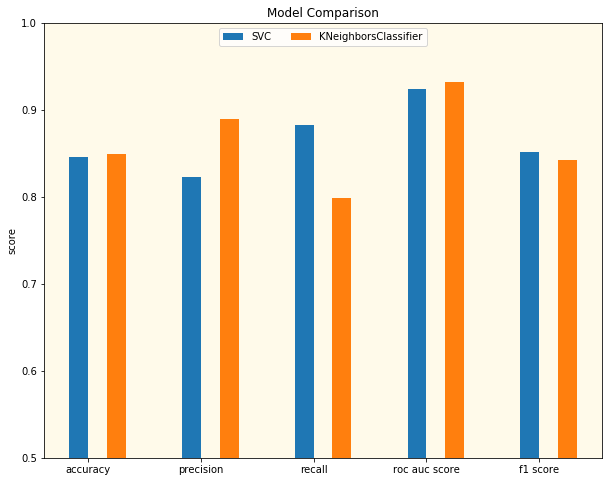

In [48]:
# plot scores
score_labels = ["fit time", "score time", "accuracy", "precision", "recall", "roc auc score", "f1 score"]
plot_results(grid_search_scores, score_labels)

In [49]:
score_labels = ["fit time", "score time","accuracy", "precision", "recall", "roc auc score", "f1 score"]
scoresh_df = df_scores(grid_search_scores,score_labels).set_index("metric")
scoresh_df

,SVC,KNeighborsClassifier
metric,,
fit time,1.417370,0.012560
score time,0.581128,1.094778
accuracy,0.845678,0.849197
precision,0.822583,0.889910
recall,0.883208,0.798997
roc auc score,0.924583,0.931542
f1 score,0.851809,0.841858


Both models show similar results the roc auc score and the accuracy, which are the most important metrics for us. KNeighborsClassifier shows slightly better results for both. A difference between both classifiers can be seen in presicision and recall. For precision KNeighborClassifier clearly performs better, but for recall SVC is clearly higher. However, the scoring time of KNeighborClassifier is higher. As both models seems to be equivalent good for our task, we decide for **SVC** because it performs faster.

## Evaluate Model on Test Set

Before evaluating the results on the test data has to be brought in the same format as our train data is. That is the feature engineering part from notebook 1. A function to convert the test data into the needed format is given in notebook 1. Here we assume that we already have the desired format. That is we only have to apply the pca and the model.

In [211]:
# pca transformation
pca = PCA(n_components=0.8,svd_solver = 'full')
# model
clf1 = grid_search_results['SVC']
clf2 = grid_search_results['KNeighborsClassifier']
pipe_clf = Pipeline([
    ('pca',pca),
    ('clf',clf1)
    ])
pipe_clf.fit(X_train, y_train)
#clf_tmp.predict(pca)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.8,
                     random_state=None, svd_solver='full', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=1, kernel='poly', max_iter=-1, probability=True,
                     random_state=42, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [212]:
y_pred  = pipe_clf.predict(X_test)
y_score = pipe_clf.predict_proba(X_test)[:,1]

In [213]:
# calculate scores
print('test accuracy: {:.3f}'.format(accuracy_score(y_true=y_test, y_pred=y_pred)))
print('precision: {:.3f}'.format(precision_score(y_true=y_test, y_pred=y_pred)))
print('recall: {:.3f}'.format(recall_score(y_true=y_test, y_pred=y_pred)))
print('roc auc Score: {:.3f}'.format(roc_auc_score(y_true=y_test, y_score=y_score)))
print('f1: {:.3f}'.format(f1_score(y_true=y_test, y_pred=y_pred)))

test accuracy: 0.925
precision: 0.944
recall: 0.900
roc auc Score: 0.973
f1: 0.921


0.9734861984060131


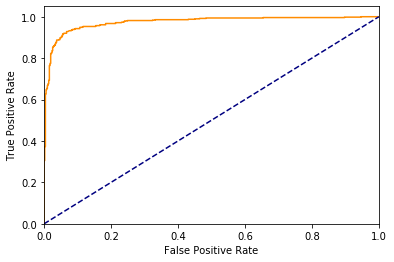

In [214]:
# roc curve
fpr, tpr, threshold = roc_curve(y_test, y_score)
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print(roc_auc_score(y_test, y_score))

In [215]:
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[480,  26],
       [ 49, 439]])

In [216]:
#classification_report
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       506
           1       0.94      0.90      0.92       488

    accuracy                           0.92       994
   macro avg       0.93      0.92      0.92       994
weighted avg       0.93      0.92      0.92       994



In [217]:
# have a closer look at the scores
sc_0  = [round(sc,3) for sc in y_score if sc <= 0.5]
sc_01 = [round(sc,3) for sc in sc_0 if sc > 0.4]
sc_02 = [round(sc,3) for sc in sc_0 if sc < 0.1]
print('classified as 0:')
print(len(sc_0))
print('classified as 0 with probability of more than 0.4:')
print(len(sc_01))
print('classified as 0 with probability of less than 0.1:')
print(len(sc_02))

classified as 0:
505
classified as 0 with probability of more than 0.4:
26
classified as 0 with probability of less than 0.1:
351


In [218]:
# have a closer look at the scores
sc_1 = [round(sc,3) for sc in y_score if sc > 0.5]
sc_11 = [round(sc,3) for sc in sc_1 if sc < 0.6]
sc_12 = [round(sc,3) for sc in sc_1 if sc > 0.9]
print('classified as 1:')
print(len(sc_1))
print('classified as 0 with probability of more than 0.9:')
print(len(sc_12))
print('classified as 0 with probability of less than 0.6:')
print(len(sc_11))

classified as 1:
489
classified as 0 with probability of more than 0.9:
353
classified as 0 with probability of less than 0.6:
24


## Kaggle Test Set

Although there are mentioned some problems with the test set provided by kaggle, we will try our model on it.

In [219]:
# read kaggle test set
X_class1E_kaggle = pd.read_csv(path_test_csv + 'test_class1_E.csv')
X_class2N_kaggle = pd.read_csv(path_test_csv + 'test_class2_N.csv')
X_class3L_kaggle = pd.read_csv(path_test_csv + 'test_class3_L.csv')
X_class4M_kaggle = pd.read_csv(path_test_csv + 'test_class4_M.csv')
# save all in 1 dataframe and delete the others
X_test_kaggle = X_class1E_kaggle.copy()
X_test_kaggle = X_test_kaggle.append(X_class2N_kaggle)
del X_class1E_kaggle
X_test_kaggle = X_test_kaggle.append(X_class3L_kaggle)
del X_class2N_kaggle
X_test_kaggle = X_test_kaggle.append(X_class4M_kaggle)
del X_class3L_kaggle
del X_class4M_kaggle
X_test_kaggle.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14397,14398,14399,id,class,classE,classN,classL,classM,granulocyte
0,dataset2-master/dataset2-master/images/TEST/EO...,0.797059,0.836275,0.797059,0.806863,0.839216,0.801961,0.814706,0.842157,0.806863,...,0.882353,0.882353,0.882353,_11_6757,1,1,0,0,0,1
1,dataset2-master/dataset2-master/images/TEST/EO...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,_7_986,1,1,0,0,0,1
2,dataset2-master/dataset2-master/images/TEST/EO...,0.792157,0.792157,0.797059,0.787255,0.781373,0.782353,0.800000,0.786275,0.778431,...,0.882353,0.882353,0.882353,_3_9885,1,1,0,0,0,1
3,dataset2-master/dataset2-master/images/TEST/EO...,0.866667,0.864706,0.864706,0.791176,0.749020,0.733333,0.756863,0.622549,0.590196,...,0.882353,0.882353,0.882353,_11_3152,1,1,0,0,0,1
4,dataset2-master/dataset2-master/images/TEST/EO...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.799020,0.785294,0.768627,_2_1953,1,1,0,0,0,1


In [220]:
X_test_kaggle.iloc[:,1:14401].head()

,0,1,2,3,4,5,6,7,8,9,...,14390,14391,14392,14393,14394,14395,14396,14397,14398,14399
0,0.797059,0.836275,0.797059,0.806863,0.839216,0.801961,0.814706,0.842157,0.806863,0.821569,...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353
1,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353
2,0.792157,0.792157,0.797059,0.787255,0.781373,0.782353,0.800000,0.786275,0.778431,0.782353,...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353
3,0.866667,0.864706,0.864706,0.791176,0.749020,0.733333,0.756863,0.622549,0.590196,0.756863,...,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353
4,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.698039,0.692157,0.662745,0.676471,0.734314,0.713725,0.705882,0.799020,0.785294,0.768627


In [221]:
X_test_kaggle.iloc[:,14405].head()

0    0
1    0
2    0
3    0
4    0
Name: classL, dtype: int64

In [222]:
#X_test_kaggle = X_test_kaggle.sample(frac=1).reset_index(drop=True)
#X_test_kaggle.head()

In [223]:
X_testK = X_test_kaggle.iloc[:,1:14401]
y_testK = X_test_kaggle.iloc[:,14405]

In [224]:
y_kaggle_pred  = pipe_clf.predict(X_testK)
y_kaggle_score = pipe_clf.predict_proba(X_testK)[:,1]

In [225]:
# calculate scores
print('test accuracy: {:.3f}'.format(accuracy_score(y_true=y_testK, y_pred=y_kaggle_pred)))
print('precision: {:.3f}'.format(precision_score(y_true=y_testK, y_pred=y_kaggle_pred)))
print('recall: {:.3f}'.format(recall_score(y_true=y_testK, y_pred=y_kaggle_pred)))
print('roc auc Score: {:.3f}'.format(roc_auc_score(y_true=y_testK, y_score=y_kaggle_score)))
print('f1: {:.3f}'.format(f1_score(y_true=y_testK, y_pred=y_kaggle_pred)))

test accuracy: 0.760
precision: 0.534
recall: 0.290
roc auc Score: 0.711
f1: 0.376


0.7107408815246123


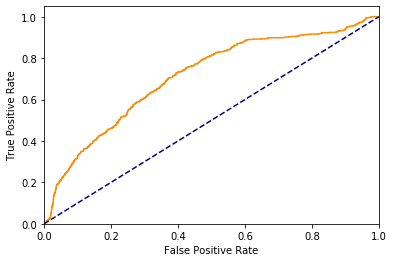

In [226]:
# roc curve
fpr, tpr, threshold = roc_curve(y_testK, y_kaggle_score)
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print(roc_auc_score(y_testK, y_kaggle_score))

In [227]:
# confusion matrix
confusion_matrix(y_true=y_testK, y_pred=y_kaggle_pred)

array([[1710,  157],
       [ 440,  180]])

In [228]:
# classification_report
print(classification_report(y_true=y_testK, y_pred=y_kaggle_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      1867
           1       0.53      0.29      0.38       620

    accuracy                           0.76      2487
   macro avg       0.66      0.60      0.61      2487
weighted avg       0.73      0.76      0.73      2487



In [229]:
# have a closer look at the scores
y_kaggle_score

array([0.13242891, 0.01983953, 0.02622385, ..., 0.1578347 , 0.01337566,
       0.00112148])

In [230]:
# have a closer look at the scores
sc_0  = [round(sc,3) for sc in y_kaggle_score if sc <= 0.5]
sc_01 = [round(sc,3) for sc in sc_0 if sc > 0.4]
sc_02 = [round(sc,3) for sc in sc_0 if sc < 0.1]
print('classified as 0:')
print(len(sc_0))
print('classified as 0 with probability of more than 0.4:')
print(len(sc_01))
print('classified as 0 with probability of less than 0.1:')
print(len(sc_02))

classified as 0:
2081
classified as 0 with probability of more than 0.4:
75
classified as 0 with probability of less than 0.1:
1355


In [231]:
# have a closer look at the scores
sc_1 = [round(sc,3) for sc in y_kaggle_score if sc > 0.5]
sc_11 = [round(sc,3) for sc in sc_1 if sc < 0.6]
sc_12 = [round(sc,3) for sc in sc_1 if sc > 0.9]
print('classified as 1:')
print(len(sc_1))
print('classified as 0 with probability of more than 0.9:')
print(len(sc_12))
print('classified as 0 with probability of less than 0.6:')
print(len(sc_11))

classified as 1:
406
classified as 0 with probability of more than 0.9:
171
classified as 0 with probability of less than 0.6:
65


In [232]:
# eosinophil 
x1 = X_test_kaggle.iloc[0:623,1:14401]
y1 = X_test_kaggle.iloc[0:623,14405]
y1_pred  = pipe_clf.predict(x1)
y1_score = pipe_clf.predict_proba(x1)[:,1]
#print("Image id:{}".format(X_test_kaggle.iloc[0:626,14401]))
print("True value: {}".format(X_test_kaggle.iloc[0:623,14405].sum()))
print("Prediction: {}".format(y1_pred.sum()))
#print("Prediction score: {:.3f}".format(y1_score))

True value: 0
Prediction: 101


In [233]:
# nithrophil 
x2 = X_test_kaggle.iloc[624:1248,1:14401]
y2 = X_test_kaggle.iloc[624:1248,14405]
y2_pred  = pipe_clf.predict(x2)
y2_score = pipe_clf.predict_proba(x2)[:,1]
#print("Image id:{}".format(X_test_kaggle.iloc[0:627,14401]))
print("True value: {}".format(X_test_kaggle.iloc[627:1251,14405].sum()))
print("Prediction: {}".format(y2_pred.sum()))
#print("Prediction score: {:.3f}".format(y1_score))

True value: 4
Prediction: 38


In [234]:
# lymphocyte 
x3 = X_test_kaggle.iloc[1249:1868,1:14401]
y3 = X_test_kaggle.iloc[1249:1868,14405]
y3_pred  = pipe_clf.predict(x3)
y3_score = pipe_clf.predict_proba(x3)[:,1]
#print("Image id:{}".format(X_test_kaggle.iloc[0:627,14401]))
print("True value: {}".format(X_test_kaggle.iloc[1251:1871,14405].sum()))
print("Prediction: {}".format(y3_pred.sum()))
#print("Prediction score: {:.3f}".format(y1_score))

True value: 616
Prediction: 180


In [235]:
# monocyte 
x4 = X_test_kaggle.iloc[1869:2487,1:14401]
y4 = X_test_kaggle.iloc[1869:2487,14405]
y4_pred  = pipe_clf.predict(x4)
y4_score = pipe_clf.predict_proba(x4)[:,1]
#print("Image id:{}".format(X_test_kaggle.iloc[0:627,14401]))
print("True value: {}".format(X_test_kaggle.iloc[1871:2491,14405].sum()))
print("Prediction: {}".format(y4_pred.sum()))
#print("Prediction score: {:.3f}".format(y1_score))

True value: 0
Prediction: 18


# Future Work

Is the quality effected if the images are converted to grey scale?

Further classification (2 types of neutrophils), get images from basophils

segmentation (bounding boxes) (white and red blood cells)

-> detect more than one cell on the image (maybe of different kinds)

count number of red blood cells and number of each class